<a href="https://colab.research.google.com/github/Anya-2004/Stock_with_LSTM/blob/main/StockLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### STOCK RETURN PREDICTION USING LSTM


In [ ]:
from tensorflow.keras.layers import Input, LSTM , GRU , SimpleRNN , GlobalMaxPool1D,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [ ]:
# trying to predict the price itself

series=df['close'].values.reshape(-1,1)  # reshape creates matrix of order 1259 x 1
series

array([[28.185],
       [28.07 ],
       [28.13 ],
       ...,
       [54.69 ],
       [55.61 ],
       [54.46 ]])

In [ ]:
series.shape                   # no. of elements in multi dim array

(1259, 1)

In [ ]:
print(series[1:3,:])          # series[rows , coloumn]

[[28.07]
 [28.13]]


In [ ]:
scaler=StandardScaler()
scaler.fit(series[:1259//2])
series=scaler.transform(series).flatten()
print(series)

[-1.62500489 -1.64174953 -1.6330132  ...  2.2342704   2.36822751
  2.20078112]


In [ ]:
# creating time series of data given above

T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)   # data should be of order N x T x D in Rnn
Y=np.array(Y)
N=len(X)

print(X.shape)
print(Y.shape)



(1249, 10, 1)
(1249,)


In [ ]:
# try autoregressive RNN model:
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),
)


Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.2675 - val_loss: 0.1223
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0207 - val_loss: 0.0551
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0087 - val_loss: 0.0486
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - val_loss: 0.0390
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - val_loss: 0.0387
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - val_loss: 0.0348
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0073 - val_loss: 0.0397
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - val_loss: 0.0411
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 - val_loss: 0.0356
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0059 - val_loss: 0.0344
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070 - val_loss: 0.0353
Epoch 12/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - val_

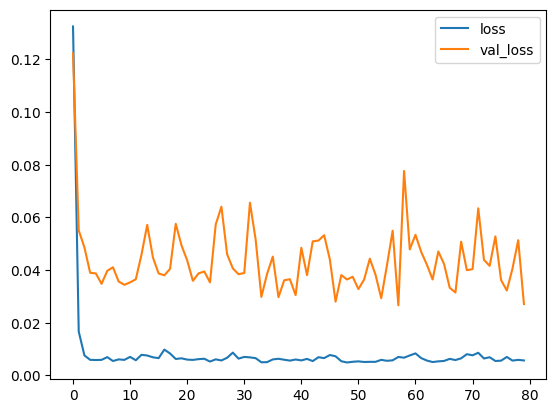

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
X

array([[[-1.62500489],
        [-1.64174953],
        [-1.6330132 ],
        ...,
        [-1.84778139],
        [-1.84486928],
        [-1.78517101]],

       [[-1.64174953],
        [-1.6330132 ],
        [-1.66431839],
        ...,
        [-1.84486928],
        [-1.78517101],
        [-1.85506167]],

       [[-1.6330132 ],
        [-1.66431839],
        [-1.68470317],
        ...,
        [-1.78517101],
        [-1.85506167],
        [-1.84996548]],

       ...,

       [[ 3.21273974],
        [ 3.2535093 ],
        [ 3.12828852],
        ...,
        [ 2.54295418],
        [ 2.42501368],
        [ 2.3915244 ]],

       [[ 3.2535093 ],
        [ 3.12828852],
        [ 3.08751896],
        ...,
        [ 2.42501368],
        [ 2.3915244 ],
        [ 2.2342704 ]],

       [[ 3.12828852],
        [ 3.08751896],
        [ 2.71476873],
        ...,
        [ 2.3915244 ],
        [ 2.2342704 ],
        [ 2.36822751]]])

In [ ]:
X[-1]

array([[3.12828852],
       [3.08751896],
       [2.71476873],
       [2.57353134],
       [2.59828429],
       [2.54295418],
       [2.42501368],
       [2.3915244 ],
       [2.2342704 ],
       [2.36822751]])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
(1249, 1)


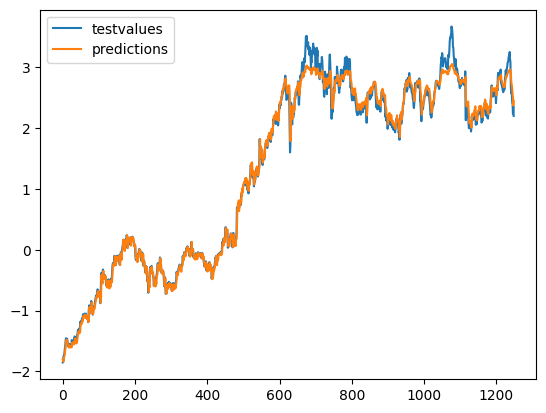

In [ ]:
# one step

outputs=model.predict(X)
print(outputs.shape)
predictions= outputs[:,0]

plt.plot(Y,label='testvalues')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

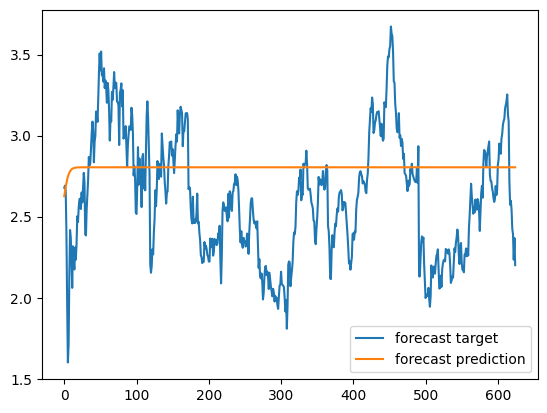

In [ ]:
#multistep forecast

validation_target=Y[-N//2:]
validation_predictions=[]

# last train input
last_x = X[-N//2]

while len(validation_predictions)< len(validation_target):
    p=model.predict(last_x.reshape(1,T,D))[0,0]
    validation_predictions.append(p)
    last_x=np.roll(last_x,-1)
    last_x[-1]=p

plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()
plt.show()



What is more conventionally predicted is the stock return;-

R = (V_final - V_initial) / V_initial

Financial data scientists dont focus on actual price but some form of return

ex:- what does it mean for something to be " 20% " off?

if something costs $ 100 and is 20% off , you'll pay $ 80

80-100 / 100 = -20%

In [ ]:
# calculate returns by first shifting the data
df['PrevClose']= df['close'].shift(1)  # moce up by 1

# so now its like
# close / prev close
# x[2] / x[1]
# x[3] / x[2]
# x[4] / x[3]
#....
# x[t] x[t-1]

Imagine you have a list of daily closing prices for a stock:

Day 1: $10 Day 2: $$10 Day 2: $12 Day 3: $11 Day 4: $$11 Day 4: $13

What this code does is create a new list that shows the previous day's closing price next to each day's closing price:

Day 1: $10 (Previous day's closing price: Not available) Day 2: $$10 (Previous day's closing price: Not available) Day 2: $12 (Previous day's closing price: $10) Day 3: $$10) Day 3: $11 (Previous day's closing price: $12) Day 4: $$12) Day 4: $13 (Previous day's closing price: $11)

Why is this helpful?

Because now we can easily calculate how much the stock price changed from one day to the next. This change is called the daily return.

How is the daily return calculated?

By dividing today's closing price by yesterday's closing price:

Day 2 return: $12 / $$12 / $10 = 1.2 (This means the stock price increased by 20%)
Day 3 return: $11 / $$11 / $12 = 0.917 (This means the stock price decreased by about 8.3%)
Day 4 return: $13 / $$13 / $11 = 1.182 (This means the stock price increased by about 18.2%)
The code does this "shifting" and comparison for all the days in the stock price data.

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [ ]:
df['Return']=(df['close'] - df['PrevClose']) / df['PrevClose']

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<Axes: >

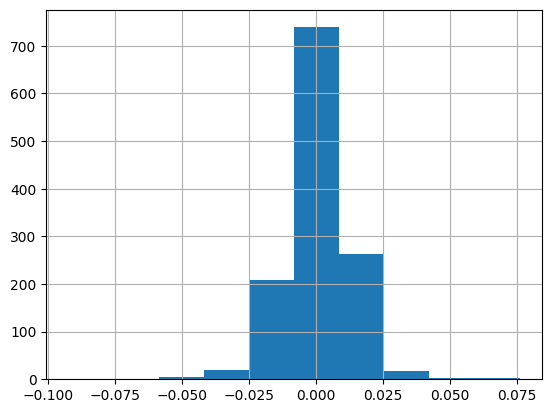

In [ ]:
df['Return'].hist()

In [ ]:
series=df['Return'].values[1:].reshape(-1,1)
series

array([[-0.00408018],
       [ 0.00213751],
       [-0.00764309],
       ...,
       [-0.01936525],
       [ 0.01682209],
       [-0.02067973]])

In [ ]:
scaler=StandardScaler()
scaler.fit(series[:len(series)//2])
scaler.transform(series).flatten()

array([-0.43811722,  0.08061497, -0.73536414, ..., -1.71332483,
        1.30572463, -1.82299002])

Imagine you have a fruit stand with apples and oranges:

fit: Think of fit as the process of measuring the average size (mean) and the typical size variation (standard deviation) of your apples. You are essentially learning the characteristics of your apples.
In the code, scaler.fit(series[:len(series)//2]) is like measuring only the first half of your apples to understand their size characteristics.
transform: Now, transform is like taking any fruit (apple or orange) and adjusting its size based on the apple measurements you learned earlier. If a fruit is larger than the average apple, you shrink it a bit; if it's smaller, you enlarge it. This makes all fruits comparable in size, even if they are different types.
In the code, scaler.transform(series) is applying this size adjustment to all your fruits (the entire series data), using the apple measurements you got from the fit step.
Why fit on half and transform all?

Let's say you want to sell your fruits based on their standardized size. If you measured all your apples, including the ones you will sell later, to determine the average size, you'd be cheating a bit. Your customers might expect apples of a certain size based on your initial measurements, but the later apples might be different, leading to unhappy customers.

To be fair, you only measure the first half of your apples (fit on the first half of the data) to establish your size standards. Then, when you sell all your fruits (transform the entire data), you adjust their sizes based on these standards, ensuring consistency and fairness for your customers.

Key Difference:

fit: Learns the characteristics (mean and standard deviation) of the data it is given.
transform: Applies a transformation to the data based on the characteristics learned during the fit step.
In the code:

We fit on only half the data to prevent data leakage – we don't want future information (the second half of the data) to influence the scaling parameters.
We transform the entire data to standardize all data points consistently based on the properties learned from the first half. This makes the data suitable for machine learning models, ensuring fairness and preventing future information from leaking into the past.

In [ ]:
# creating data set

X=[]
Y=[]

for t in range(len(series)-T):
    x=series[t:t+T]
    y=series[t+T]
    X.append(x)
    Y.append(y)

X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print(X.shape)
print(Y.shape)



(1248, 10, 1)
(1248, 1)


In [ ]:
# RNN model

i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01),
)

model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),

)


Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.1295e-04 - val_loss: 2.1008e-04
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6260e-04 - val_loss: 1.7284e-04
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4625e-04 - val_loss: 1.6354e-04
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2531e-04 - val_loss: 1.6351e-04
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3893e-04 - val_loss: 1.6638e-04
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4415e-04 - val_loss: 1.6732e-04
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4324e-04 - val_loss: 1.6876e-04
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4750e-04 - val_loss: 1.6377e-04
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2898e-04 - val_loss: 1.8145e-04
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7112e-04 - val_loss: 1.6323e-04
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4891e-04 - val

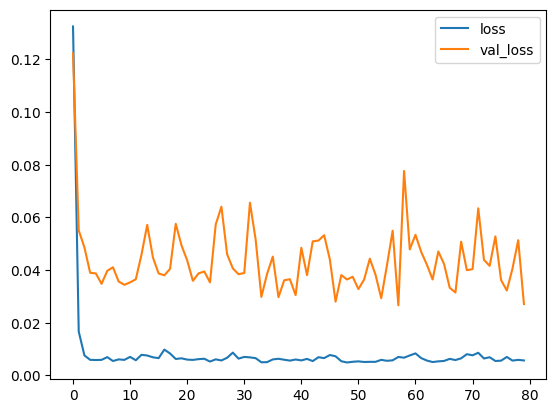

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(1248, 1)


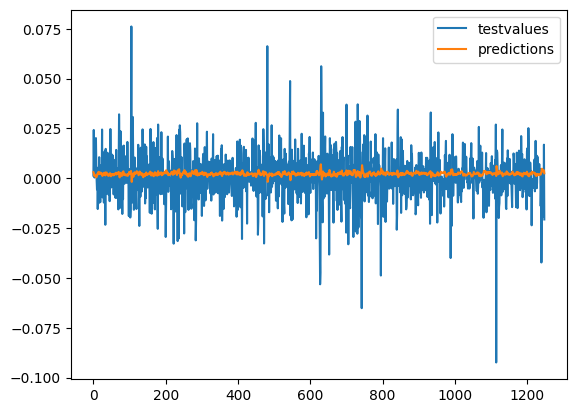

In [ ]:
# one step forecast

outputs=model.predict(X)
print(outputs.shape)
predictions= outputs[:,0]

plt.plot(Y,label='testvalues')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━

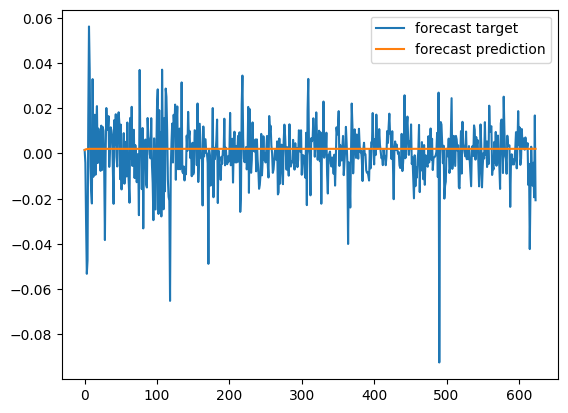

In [ ]:
# multi step forecast
validation_target=Y[-N//2:]
validation_predictions=[]

# last train input
last_x = X[-N//2]

while len(validation_predictions)< len(validation_target):
    p=model.predict(last_x.reshape(1,T,D))[0,0]
    validation_predictions.append(p)
    last_x=np.roll(last_x,-1)
    last_x[-1]=p

plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()
plt.show()



## Making third Model

make use of all data including: open , high , low , close , volume (D=5)

- Lets do simple task as possible: predict whether the price will go up or down ( equivalent to predicting whether the return is +ve or -ve)

- This is just binary classification ( a common approach in finance)

In [ ]:
input_values= df[['open','high','low','close','volume']].values
targets = df['Return'].values

In [ ]:
T=10
D=input_values.shape[1]
N=len(input_values)-T


In [ ]:
input_values

array([[2.7920000e+01, 2.8325000e+01, 2.7920000e+01, 2.8185000e+01,
        7.1462960e+06],
       [2.8260000e+01, 2.8260000e+01, 2.7930000e+01, 2.8070000e+01,
        5.4573540e+06],
       [2.8000000e+01, 2.8275000e+01, 2.7975000e+01, 2.8130000e+01,
        8.6655920e+06],
       ...,
       [5.5530000e+01, 5.6260000e+01, 5.4570000e+01, 5.4690000e+01,
        1.6059955e+07],
       [5.3685000e+01, 5.6060000e+01, 5.3560000e+01, 5.5610000e+01,
        1.7415065e+07],
       [5.5080000e+01, 5.5430000e+01, 5.4440000e+01, 5.4460000e+01,
        1.3927022e+07]])

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [ ]:
Ntrain = len(input_values) * 2//3
scalar=StandardScaler()
scalar.fit(input_values[:Ntrain+T])
input_values=scalar.transform(input_values)


In [ ]:
# Setup X train and Y train

X_train=np.zeros((Ntrain,T,D))
Y_train=np.zeros(Ntrain)

# print(X_train[2,:,:])
# print(Y_train[2])

for t in range(Ntrain):
  X_train[t,:,:]=input_values[t:t+T]
  Y_train[t]=(targets[t+T]>0)


(targets[t+T]>0): This checks if the target value is greater than 0. If it is, it assigns 1 to Y_train[t], indicating a positive return (price went up); otherwise, it assigns 0, indicating a negative or zero return (price went down or stayed the same).

In [ ]:
# X test and Y test

X_test=np.zeros((N-Ntrain,T,D))
Y_test=np.zeros(N-Ntrain)

# u = counts from 0.... N-Ntrain
# t counts from Ntrain ... N

for u in range(N-Ntrain):
  t= u + Ntrain
  X_test[u,:,:]=input_values[t:t+T]
  Y_test[u]=(targets[t+T]>0)

In [ ]:
i= Input(shape=(T,D))
x=LSTM(50)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

r=model.fit(
    X_train,Y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_test,Y_test),
)

Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5030 - loss: 0.7113 - val_accuracy: 0.4854 - val_loss: 0.7025
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4972 - loss: 0.6927 - val_accuracy: 0.5537 - val_loss: 0.6912
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5101 - loss: 0.6916 - val_accuracy: 0.4805 - val_loss: 0.6946
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5107 - loss: 0.6940 - val_accuracy: 0.5171 - val_loss: 0.6930
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5612 - loss: 0.6869 - val_accuracy: 0.4878 - val_loss: 0.6951
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5629 - loss: 0.6884 - val_accuracy: 0.5098 - val_loss: 0.6942
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5563 - loss: 0.6850 - val_accuracy: 0.5244 - val_loss: 0.6918
Epoch 8/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5530 - loss: 0.6879 - val_accuracy: 0.4927 - 

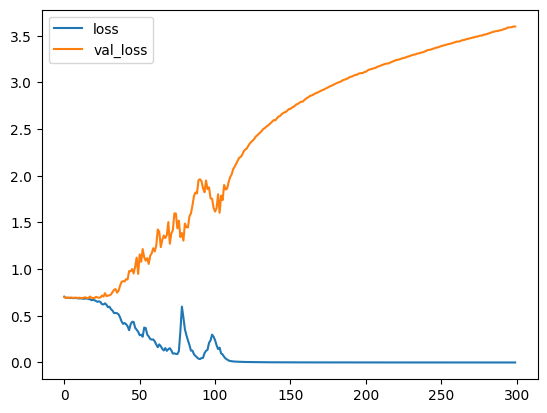

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#overfitting to the noise

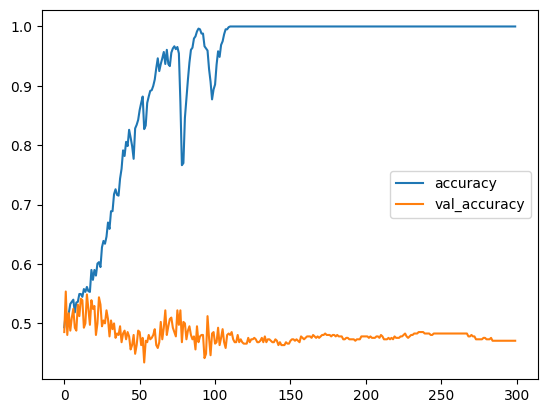

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# for better predictions

Use a random walk model(very close to
stock prices), a naive forecast is the best forecast